In [1]:
import os
import pandas as pd
import pandas as pd
import numpy as np
import cvxpy as cp
import yfinance as yf
from tqdm import tqdm
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import gurobipy as gp
from gurobipy import GRB
from scipy.stats import norm

In [13]:
# Load the result data.
file_path = '.\ALASSO_20_0809233446.csv'
alasso_results = pd.read_csv(file_path, index_col='date', parse_dates=True)
# Load the result data.
file_path = '.\CARD_20_0809233446.csv'
card_results = pd.read_csv(file_path, index_col='date', parse_dates=True)
# Load the result data.
file_path = '.\MSW-LASSO-LOGM_20_0809233446.csv'
logm_results = pd.read_csv(file_path, index_col='date', parse_dates=True)
# Load the result data.
file_path = '.\MSW-LASSO-lq_20_0809233446.csv'
lq_results = pd.read_csv(file_path, index_col='date', parse_dates=True)
# Load the result data.
file_path = '.\MSW-LASSO-SCAD_20_0809233446.csv'
scad_results = pd.read_csv(file_path, index_col='date', parse_dates=True)
# Load the result data.
file_path = '.\SLOPE_20_0809233446.csv'
slope_results = pd.read_csv(file_path, index_col='date', parse_dates=True)

In [12]:
alasso_results.head()

,te,to,num of selected,beta
date,,,,
2016-12-30,0.096186,0.002822,20,"[array([2.04883750e-01, 2.91405771e-06, 4.8322..."
2017-02-01,0.068789,0.002763,20,"[array([2.62575058e-04, 3.16153809e-05, 1.4180..."
2017-03-03,5.767525,0.003106,19,"[array([6.08689451e-08, 2.69058058e-07, 9.6826..."
2017-04-03,2.021270,0.003101,20,"[array([2.56916060e-09, 5.19325114e-09, 9.6985..."
2017-05-03,3.183744,0.003101,20,"[array([0.00000000e+00, 2.07058893e-07, 3.5870..."


In [15]:
# Load the result data for each algorithm
file_paths = {
    'ALASSO': './ALASSO_20_0809233446.csv',
    'CARD': './CARD_20_0809233446.csv',
    'LOGM': './MSW-LASSO-LOGM_20_0809233446.csv',
    'LQ': './MSW-LASSO-lq_20_0809233446.csv',
    'SCAD': './MSW-LASSO-SCAD_20_0809233446.csv',
    'SLOPE': './SLOPE_20_0809233446.csv'
}

In [17]:
# Load all algorithm results
dataframes = []
for name, path in file_paths.items():
    df = pd.read_csv(path, index_col='date', parse_dates=True)
    df['algorithm'] = name
    dataframes.append(df)

# Concatenate all dataframes
results = pd.concat(dataframes)

# Compute the mean for te, to, and num of selected for each algorithm
means = results.groupby('algorithm').agg({
    'te': 'mean',
    'to': 'mean',
    'num of selected': 'mean'
}).reset_index()

# Print the results
print(means)

  algorithm        te        to  num of selected
0    ALASSO  0.217588  0.001744        19.309859
1      CARD  0.003664  0.002945        17.816901
2      LOGM  0.005511  0.002581        12.690141
3        LQ  0.005511  0.002581        12.690141
4      SCAD  0.005511  0.002581        12.690141
5     SLOPE  0.005511  0.002581        12.690141


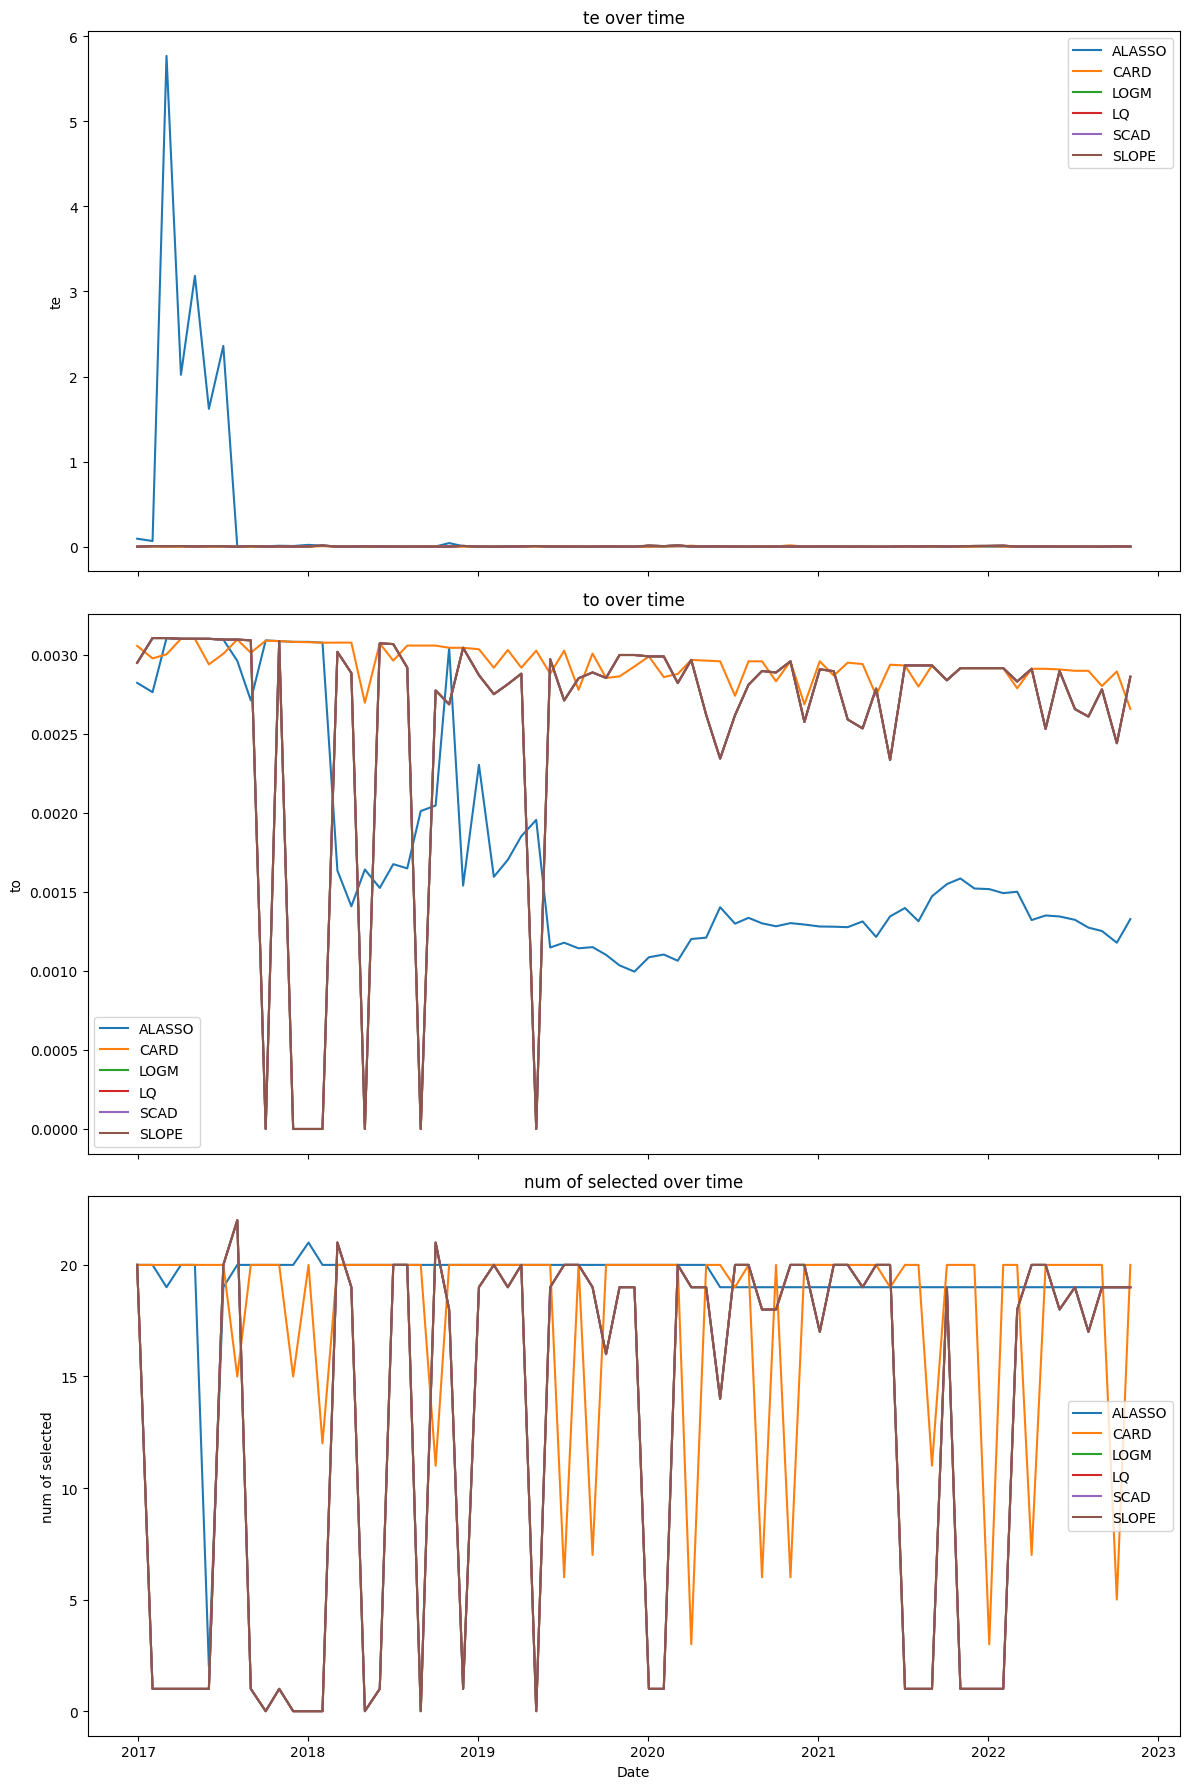

In [14]:


dataframes = []
for name, path in file_paths.items():
    df = pd.read_csv(path, index_col='date', parse_dates=True)
    df['algorithm'] = name
    dataframes.append(df)

# Concatenate all dataframes
results = pd.concat(dataframes)

# Plotting the changes over time
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Plot 'te'
for algo in results['algorithm'].unique():
    subset = results[results['algorithm'] == algo]
    axes[0].plot(subset.index, subset['te'], label=algo)
axes[0].set_ylabel('te')
axes[0].legend()
axes[0].set_title('te over time')

# Plot 'to'
for algo in results['algorithm'].unique():
    subset = results[results['algorithm'] == algo]
    axes[1].plot(subset.index, subset['to'], label=algo)
axes[1].set_ylabel('to')
axes[1].legend()
axes[1].set_title('to over time')

# Plot 'num of selected'
for algo in results['algorithm'].unique():
    subset = results[results['algorithm'] == algo]
    axes[2].plot(subset.index, subset['num of selected'], label=algo)
axes[2].set_ylabel('num of selected')
axes[2].legend()
axes[2].set_title('num of selected over time')

plt.xlabel('Date')
plt.tight_layout()
plt.show()